stellar_params: {'Ms': 1, 'Rs': 2.0, 'Ts': 5000, 'accrate': 1e-07, 'f': 0.01}
disk_params: {'Mdisk': 0.01, 'Mfrac': [0.01, 0.01], 'R0': [1, 1], 'H0': [1, 0.3], 'p': [-1, -1], 'Rdisk': [60, 60]}
envelope_params: {'Min': 1e-05, 'Rc': 100, 'rho_amb': 1e-25, 'rho_0': 3e-22, 'theta_min': 25, 'exf': 0.25, 'Rmax': 15000.0, 'd2g': 0.01, 'shock': True, 'nstreams': 4, 'stream_frac': 0.5}
grid_params: {'N': [180, 90, 90], 'min': [0.1, 0.19634954084936207, 0], 'max': [400, 1.5707963267948966, 6.283185307179586], 'spacing': ['log', 'lin', 'lin']}
dust_params: {'rho_si': 3.1518, 'amin_chem': 0.06, 'amax_ism': 1.0, 'amin': [0.005, 0.005], 'amax': [1, 1000.0], 'apow': [3.5, 3.5]}
RT_params: {'cr_model': 'ssx', 'zetacr': 1.3e-17, 'G0': 1, 'viscous_heating': False, 'fLya': 0.0001}
directory exists - will overwrite current model if you write to it!
Reading wavelength_micron.inp
Writing wavelength_micron.inp
Reading wavelength_micron.inp
Writing stars.inp
Reading amr_grid.inp
Reading wavelength_micron.inp

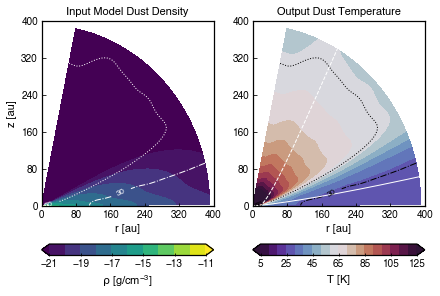

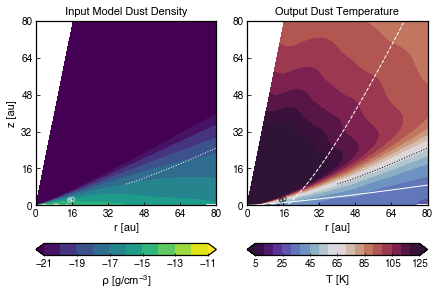

In [19]:
# %load ./scripts/do_RT_thermal.py
from pylab import *
import radmc3dPy as rpy
import numpy as np
import os
from scipy import interpolate
import sys
#sys.path.append('../')
from models import *



p0 = 'default'
outdir = '/out/m1_test/'
pdef = new_model(p0)
pdef['nstreams'] = 4
pdef['stream_frac'] = 0.5
pdef['Mdisk'] = 0.01
pdef['Min'] = 1e-5
pdef['Rdisk'] = [60,60]
pdef['R0'] = [1,1]
pdef['Rc'] = 100
pdef['shock'] = True
pdef['N'] = [180,90,90]
m0 = initialize_model(pdef,outdir=outdir)
#save_setup_fig(m0)

prep_thermal_transfer(m0,nphot=1000000)
print('ready to do thermal montecarlo!')

do_thermal_transfer(m0,nt=8)
print('thermal monte carlo done!')

save_dustRT(m0)

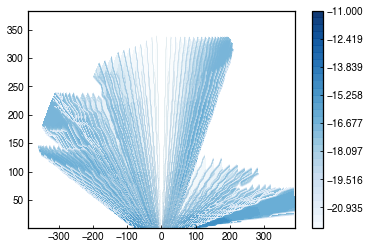

In [20]:
def plot_slices(output,rho,log=True,**plot_params):
    model = output.m
    R,THETA,PHI = model.make_grid()
    X_CYL = R*np.sin(THETA)*np.cos(PHI)
    Y_CYL = R*np.sin(THETA)*np.sin(PHI)
    Z_CYL = R*np.cos(THETA)
    np0 = len(model.phi)
    for ip in range(np0):
        alpha = 1 - np.amax(np.abs((Y_CYL[:,:,ip])))/400.
        if np.shape(X_CYL[:,:,ip]) != np.shape(rho[:,:,ip]):
            rhop = rho[:,:,ip].T
        else:
            rhop = rho[:,:,ip]
        contourf(X_CYL[:,:,ip],Z_CYL[:,:,ip],rhop,alpha=alpha,**plot_params)
    colorbar()
    show()
        
plot_slices(m0,np.log10(m0.m.rho_streamvelope(nstream=4, dphi_frac=0.5)),levels=np.linspace(-22,-11,32),cmap='Blues')

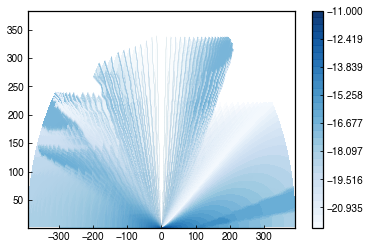

In [21]:
plot_slices(m0,np.log10(m0.m.rho_embedded()),levels=np.linspace(-22,-11,32),cmap='Blues')

Reading dust_temperature.dat


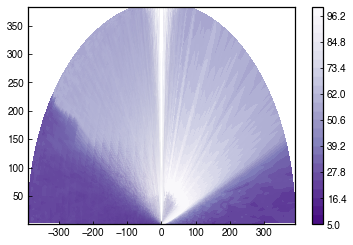

In [26]:
def T3D(self):
    if os.getcwd() != self.m.outdir:
        os.chdir(self.m.outdir)
    self.data.readDustTemp()#self.data.Tdust is now loaded in
    return self.data.dusttemp[:,:,:,0] #only load first dust temp

plot_slices(m0,T3D(m0),levels=np.linspace(5,100,26),cmap='Purples_r')

In [12]:
o1 = observe(m0,incl=90,wav=1200,dpc=140,npix=500,sizeau=300,beam_au=[30,20],fwhm=[None,None])


Executing RADMC-3D Command:
radmc3d image npix 500 incl 90 sizeau 300 lambda 1200 pointau 0.0  0.0  0.0 fluxcons
Reading image.out
Executing RADMC-3D Command:
radmc3d image npix 500 incl 90 sizeau 300 lambda 1200 pointau 0.0  0.0  0.0 fluxcons
Reading image.out


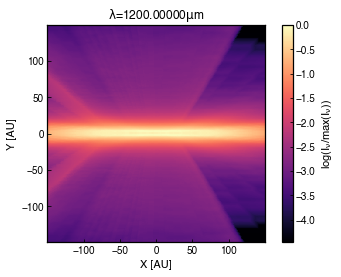

{'implot': <matplotlib.image.AxesImage at 0x7f9c2252ebe0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7f9c25971820>}

In [18]:
rpy.image.plotImage(o1.i_bo,log=True,au=True,dpc=o1.dpc, cmap='magma')

Reading wavelength_micron.inp
Writing wavelength_micron.inp
Reading wavelength_micron.inp
Writing stars.inp
Accretion rate from infall: 1.7654175533250615e-09 Msun/yr
Reading wavelength_micron.inp
Reading wavelength_micron.inp
Writing mcmono_wavelength_micron.inp
Reading wavelength_micron.inp
Reading wavelength_micron.inp
Reading wavelength_micron.inp
Reading amr_grid.inp
ready to do thermal montecarlo!
thermal monte carlo done!


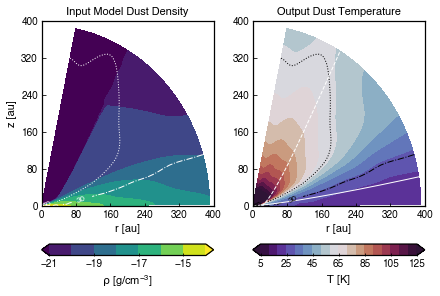

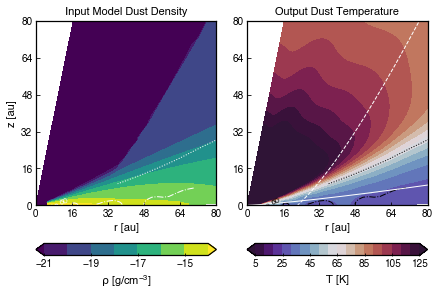

In [3]:
prep_thermal_transfer(m0,nphot=1000000)
print('ready to do thermal montecarlo!')

do_thermal_transfer(m0,nt=8)
print('thermal monte carlo done!')

save_dustRT(m0)

ready to do high energy radiation montecarlo!
high energy monte carlo done!


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


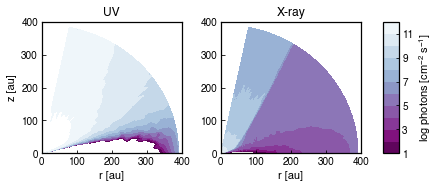

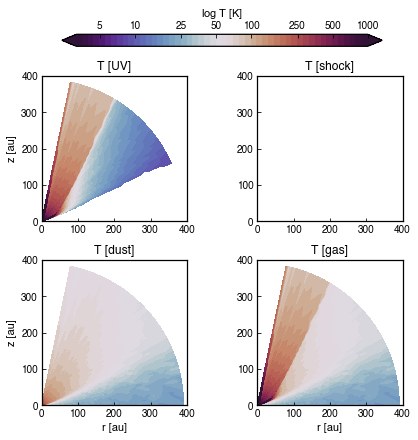

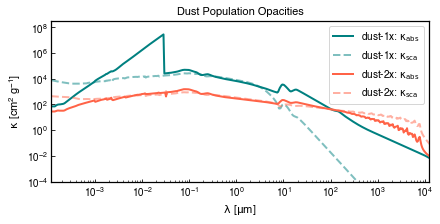

In [4]:
prep_he_transfer(m0)
print('ready to do high energy radiation montecarlo!')

do_he_transfer(m0,nt=8,nphot=1000000)
print('high energy monte carlo done!')

save_heRT(m0)

In [1]:
# %load ./scripts/do_RT_he.py
from pylab import *
import radmc3dPy as rpy
import numpy as np
import os
from scipy import interpolate
import sys
sys.path.append('../')
from models import *

outdir = './out/m1_test/'
m0 = load_model(outdir)

prep_he_transfer(m0)
print('ready to do high energy radiation montecarlo!')

do_he_transfer(m0,nt=8)
print('high energy monte carlo done!')

save_heRT(m0)

In [1]:
# %load ./scripts/do_RT_he.py
from pylab import *
import radmc3dPy as rpy
import numpy as np
import os
from scipy import interpolate
#import sys
#sys.path.append('../')
from models import *

outdir = './out/m1_test/'
m0 = load_model(outdir)

stellar_params: {'Ms': 1, 'Rs': 2.0, 'Ts': 5000, 'accrate': 1e-07, 'f': 0.01}
disk_params: {'Mdisk': 0.06, 'Mfrac': [0.01, 0.01], 'R0': [5, 5], 'Rout': [100, 50], 'H0': [1, 0.3], 'p': [-1, -1], 'fi': [0.25, 0.25], 'Rdisk': [125, 125]}
envelope_params: {'Min': 1e-06, 'Rc': 125, 'rho_amb': 1e-25, 'rho_0': 3e-22, 'theta_min': 25, 'exf': 0.25, 'Rmax': 15000.0, 'd2g': 0.01, 'shock': False}
grid_params: {'N': [180, 90, 48], 'min': [0.1, 0.19634954084936207, 0], 'max': [400, 1.5707963267948966, 6.283185307179586], 'spacing': ['log', 'lin', 'lin']}
dust_params: {'rho_si': 3.1518, 'amin_chem': 0.06, 'amax_ism': 1.0, 'amin': [0.005, 0.005], 'amax': [1, 1000.0], 'apow': [3.5, 3.5]}
RT_params: {'cr_model': 'ssx', 'zetacr': 1.3e-17, 'G0': 1, 'viscous_heating': False, 'fLya': 0.0001}
directory exists - will overwrite current model if you write to it!
Loading from model directory:/Users/aleksandra/Desktop/wedgeford/./out/m1_test/
Reading amr_grid.inp
Reading wavelength_micron.inp


In [3]:
from models.prepchem import *

### Make your new grid for the chemistry

In [97]:
from scipy.ndimage import gaussian_filter
class chemdisk:
    def __init__(self,output,chemdir = '/test1/'):
        self.input = output
        self.chemdir = self.input.m.parent_dir + 'chemistry/environ' + chemdir
        self.rundir = self.input.m.parent_dir + 'chemistry/runs' + chemdir
        if os.getcwd() != self.input.m.outdir:
            os.chdir(self.input.m.outdir)
        if output.rho == {}:
            output.rho2D()
        if output.T == {}:
            output.T2D()
        if output.J == {}:
            output.Jnu(field='uv')
            output.Jnu(field='xray')
        if 'gas' not in output.T.keys():
            calc_gas_T(output)
        self.data = {}
        self.inpfiles = {}
        self.set_2()
        self.set_3()
        self.set_4()
        self.set_5()
        self.set_6()
        
        try:
            os.mkdir(self.chemdir)
        except:
            print('environ directory exists - will overwrite current model if you write to it!')
        
        try:
            os.mkdir(self.rundir)
        except:
            print('run directory exists!')
    
    def regrid_disk(self):
        model = self.input.m
        rho_g = self.input.rho['gas']
        rho_d1 = self.input.rho['dust1'] 
        rho_d2 = self.input.rho['dust2']
        T_d = self.input.T['dust']
        T_g = self.input.T['gas'].T
        rhod1_2d = self.make_quadrant(rho_d1, fill_value = model.env['rho_amb']*model.env['d2g'],order='F',smooth=False).T
        rhod2_2d = self.make_quadrant(rho_d2, fill_value = 0,order='F',smooth=False).T
        rhog_2d = self.make_quadrant(rho_g, fill_value = model.env['rho_amb'], order='F',smooth=False).T
        r,z = self.make_rz_H()
        #temperature gets smoothed before it goes in there as noise from radmc can make interpolation wonky
        Td_2d = self.make_quadrant(T_d,fill_value = 0,order='F')
        #fill in the bits outside the model quadrant with an ambient temperature from the model
        T_amb = model.T(np.sqrt(r**2 + z**2))
        Td_2d[Td_2d < 1] = T_amb[Td_2d < 1]
        Td_2d = Td_2d.T
        
        Tg_2d = self.make_quadrant(T_g,fill_value = 0,order='F')
        #fill in the bits outside the model quadrant with an ambient temperature from the model
        Tg_2d[Tg_2d < 1] = T_amb[Tg_2d < 1]
        Tg_2d = Tg_2d.T
        return rhog_2d, rhod1_2d, rhod2_2d, Td_2d, Tg_2d 
    
    def fill_data(self):
        rhog_2d, rhod1_2d, rhod2_2d, Td_2d, Tg_2d = self.regrid_disk()
        self.data['Tg'] = Tg_2d.flatten().reshape(np.shape(self.data['r']))
        self.data['rhod1'] = rhod1_2d.flatten().reshape(np.shape(self.data['r']))
        self.data['rhod2'] = rhod2_2d.flatten().reshape(np.shape(self.data['r']))
        
         
    def make_rz_H(self): #make a logarithmically spaced cylindrical grid
        model = self.input.m
        zmin = 1e-10
        new_r = np.logspace(np.log10(model.grid['min'][0]), np.log10(model.grid['max'][0]), model.grid['N'][0])
        zf_norm = np.append(zmin, np.logspace(-4,0,50)) #faces of the z-cells
        zc_norm = 0.5*(zf_norm[1:] + zf_norm[:-1]) #50 points in the Z direction
        R,Z = np.meshgrid(new_r,zc_norm)
        Z *= R/np.tan(np.radians(model.env['theta_min']))
        return R,Z
    
    def make_quadrant(self,quantity_2d,fill_value=0,order='F',smooth=True): # to be used with the radmc 3d values
        model = self.input.m
        r_cyl,z_cyl = model.make_rz()
        r_new, z_new = self.make_rz_H()
        if smooth == True:
            quantity_2d = gaussian_filter(quantity_2d, sigma=[1,4])
        quantity_2d_interp = griddata((r_cyl[:,:,0].flatten(),z_cyl[:,:,0].flatten()), quantity_2d.ravel(order=order), (r_new,z_new),fill_value=fill_value,method='linear',rescale=True)
        return quantity_2d_interp
    
    def write_out(self,outname='model',ndust=2):
        model = self.input.m
        if os.getcwd() != model.outdir:
            os.chdir(model.outdir)
        r,z = self.make_rz_H()
        header1 = 'R(AU)    z(AU)   rhogas(g/cm3)  rhodust(g/cm^3)    T(K)   [    4 types of dust]      f_H\n'
        header2 = '-ForChem+Plots--------------------------------------------------------\n'

        rhog_2d, rhod1_2d, rhod2_2d, Td_2d, Tg_2d  = self.regrid_disk()
        rhod_2d = rhod1_2d + rhod2_2d
        with open(self.chemdir + outname+'.out',"w") as outfile:
            outfile.write(header1)
            outfile.write(header2)
            Nr = len(r.flatten())
            for n in np.arange(Nr):
                outfile.write('%10.7f %10.7f   %5.2e   %5.2e %7.1f %12.7f %12.7f %12.7f %12.7f   %7.2e\n'%(r.T.flatten()[n],z.T.flatten()[n],rhog_2d.flatten()[n], rhod_2d.flatten()[n] ,Td_2d.flatten()[n],1.0,0.0,0.0,0.0,1.0))
        return outname + '.out'

    def read_out(self,outname='model'): #convenience function for reading the .out file and returning the bits accessible as dictionary
        if os.getcwd() != self.chemdir:
            os.chdir(self.chemdir)
        if os.path.exists(outname+'.out') == False:
            self.write_out(outname)
        data = np.loadtxt(outname+'.out',skiprows=2,usecols=(0,1,2,3,4))
        r = data[:,0]
        z = data[:,1]
        shape = (len(np.unique(r)),50)
        rhog = data[:,2].reshape(shape)
        rhod = data[:,3].reshape(shape)
        T = data[:,4].reshape(shape)
        self.data = {'r':r.reshape(shape), 'z':z.reshape(shape),'rhog':rhog,'rhod':rhod,'Td':T}
        self.fill_data()
        
    def calc_zeta(self,cr_model=''):
        if self.data == {}:
            self.read_out()
        if cr_model == '':
            cr_model = self.input.m.rad['cr_model']
        def zetaeval(ncol,model=cr_model):
            labels = ['m02','w98','ssm','ssx','ttm','ttx']
            #Rates from Cleeves et al. 2014
            #zeta_powerlaw alpha zeta_exponential Sigma
            allrts = np.array([[6.8e-16,3.7e-18,0.423,210.0],
                [2.0e-17,9.4e-19,0.021,260.0],
                [1.1e-18,3.0e-19,-0.00,260.0],
                [1.6e-19,7.5e-20,-0.01,250.0],
                [7.0e-21,4e-21,-0.01,290.0],
                [1.1e-22,3e-23,-0.02,490.0]])

            modin = labels.index(model)
            zp = allrts[modin,0]
            ze = allrts[modin,1]
            al = allrts[modin,2]
            co = allrts[modin,3]
            mumult = 2.36
            piv = 1e20
            F = zp*ze*mumult/(ze*mumult*(ncol/piv)**al+zp*(np.exp(ncol*2.0*mh/co)-1)) #C13 eq5
            return F

        Ncol_external = 1e10 #column before disk surface

        rhog = self.data['rhog']
        axis = 1
        rpts = np.unique(self.data['r'])
        zmin = 1e-10
        zc = self.data['z']
        dzz = 0.18741465494412662 #delta z/z for 50 bins 
        dz = zc*dzz*AU #in cm
        rhog_los = np.append(np.flip(rhog,axis=axis),rhog,axis=axis)
        dz_los = np.append(np.flip(dz,axis=axis),dz,axis=axis)
        Ncol_zpos = np.cumsum(rhog_los*dz_los,axis=axis)/(mu*mh) + Ncol_external
        Ncol_zneg = np.cumsum(np.flip(rhog_los*dz_los,axis=axis),axis=axis)/(mu*mh) + Ncol_external
        zeta = 0.5*zetaeval(Ncol_zpos,model=cr_model) + 0.5*zetaeval(Ncol_zneg,model=cr_model)
        self.data['zeta'] = zeta[:,50:]
        self.data['zcm'] = np.flip(np.cumsum(dz_los[:,:50],axis=axis),axis=axis)
        self.data['Nrz'] = np.ones_like(self.data['z'])*Ncol_external
        
        
    def calc_dustfrac(self):
        if self.data == {}:
            self.read_out()
        model = self.input.m
        a_chem = 0.1*1e-4 #microns to cm
        sa_chem = a_chem**2 #factor of 4pi cancels out in ratio
        df0 = np.zeros_like(self.data['rhod']) #total area in the cell
        ndust = len(model.dust['amin'])
        df = np.zeros_like(df0)
        for d in range(ndust):
            key = 'rhod'+str(d+1)
            p = model.dust['apow'][d]
            amin = model.dust['amin'][d]*1e-4
            amax = model.dust['amax'][d]*1e-4
            #sa_tot = 3*((4.-p)/(3.-p))*(amax**(3-p) - amin**(3-p))/(amax**(4-p)-amin**(4-p))
            sa_tot = ((1.-p)/(3.-p))*(amax**(3-p) - amin**(3-p))/(amax**(1-p)-amin**(1-p))
            df += (self.data[key]/model.dust['rho_si'])*sa_tot
            df0 += (self.data[key]/model.dust['rho_si'])*sa_chem
        self.data['dustfrac'] = df/df0
        
    def regrid_radiation(self,field='uv'):
        model = self.input.m
        freq = self.input.J[field][0]
        Jfreq = self.input.J[field][1]
        if field == 'uv':
            lam_chem = np.arange(930,2010,10) #in angstroms
            lam_mu = lam_chem*1e-4 #in microns
            #lam_rt = np.linspace(uv_min,uv_max,5)
            lam_rt = 1e4*(c/freq)
            lam_conv = 1e-8* c/(lam_mu*1e-4)**2 #convert /Hz to /angstrom dnu/dlam
        if field == 'xray':
            lam_chem = np.arange(1,21,1) #in keV
            lam_mu = (1e4*h*c)/(lam_chem*keV) #in microns
            #lam_rt = np.logspace(np.log10(xray_min),np.log10(xray_max),5)
            lam_rt = 1e4*(c/freq)
            lam_conv = (keV/h) #convert /Hz to /keV
        lam_bins = [lam_mu[(lam_mu >= lam_rt[i]) & (lam_mu < lam_rt[i+1])] for i in np.arange(len(lam_rt)-1)]
        nu_bins = [c/(lam_mu[(lam_mu >= lam_rt[i]) & (lam_mu < lam_rt[i+1])]*1e-4) for i in np.arange(len(lam_rt)-1)]
        spec0 = bin_input_spectrum(model,field=field)
        fband0 = [np.abs(np.trapz(spec0(l_bins),x=n_bins)) for l_bins,n_bins in zip(lam_bins,nu_bins)]
        flam0 = spec0(lam_rt)
        R2 = (self.data['r']*AU)**2 + (self.data['z']*AU)**2
        J_2d = np.zeros_like(freq,dtype='object')
        J0_2d = np.zeros_like(freq,dtype='object')
        catt_2d = np.zeros_like(freq,dtype='object')
        
        for j in np.arange(len(freq)):
            J0_2d[j] = flam0[j]*(pc**2)/R2
            j02d = J0_2d[j]
            jfreq = Jfreq[j]
            j2d = self.make_quadrant(jfreq, fill_value = -999, order='F').T.flatten().reshape(np.shape(self.data['r']))
            R2rim = np.amax(R2[j2d != -999])
            index = np.argmin(np.abs(R2-R2rim),axis=-1)
            jrim  = np.clip(np.expand_dims(np.array([j2d[i,j] for i,j in zip(np.arange(len(index)),index-1)]),axis= -1),a_min=np.amin(j2d[j2d!= -999]),a_max=None)*(R2rim/R2)
            j2d[j2d == -999] = jrim[j2d == -999]
            J_2d[j] = np.minimum(j2d,j02d)
            catt_2d[j] = J_2d[j]/J0_2d[j]
        fband0 = np.expand_dims(np.array(fband0),axis=(0,1))*(pc**2)/np.expand_dims(R2,axis=-1)
        catt2d = (np.dstack(catt_2d)[:,:,1:] + np.dstack(catt_2d)[:,:,:-1])*0.5
        spec_att = interpolate.interp1d(x=1e4*(c/(freq)),y=np.dstack(J_2d),axis=-1,fill_value='extrapolate',kind='slinear')
        lum_att = np.abs(np.trapz(np.abs(spec_att(lam_mu)), x=(c/(1e-4*lam_mu)),axis=-1))
        norm_fac = np.sum(catt2d*fband0,axis=-1)/lum_att
        photon_e = 1./(h*c/(lam_mu*1e-4))
        spec_final = np.abs(spec_att(lam_mu))*np.expand_dims(norm_fac,axis=-1)*photon_e*lam_conv
        if field == 'uv':
            #put in lyman alpha line
            fpeak = Lya_line(model,fLya=model.rad['fLya'])
            lya_lam = 0.1210 #rounded lya wavelength
            photon_e = 1./(h*c/(lya_lam*1e-4))
            lam_conv = 1e-8* c/(lya_lam*1e-4)**2 
            fpeak *= photon_e*lam_conv
            fpeak = fpeak * (pc**2)/R2
            ilya = np.argmin(np.abs(lam_mu-lya_lam))
            #scale by attenuation in continuum
            ratio = spec_final[:,:,ilya]/(photon_e*lam_conv*spec0(lam_mu)[ilya]*(pc**2)/R2)
            spec_final[:,:,ilya] += fpeak*ratio
        return spec_final
    
    def set_1(self):
        self.read_out()
        self.calc_dustfrac()
        self.calc_zeta()
    
    def set_2(self,**tkwargs):
        template_path = self.input.m.parent_dir+'chemistry/templates/'
        template_file = template_path + '2times.inp'
        file_contents = []
        with open(template_file, 'r') as f:
            for line in f:
                if line.startswith('#'):
                    file_contents.append(line)
                else:
                    val = line.split('#')[0].strip()
                    comment = line.split('#')[-1].strip()
                    if comment.startswith('last') and 'last' in tkwargs.keys():
                        val = '{:9.3E}'.format(tkwargs['last']).replace('E','D')
                    if comment.startswith('first') and 'first' in tkwargs.keys():
                        val = '{:9.3E}'.format(tkwargs['first']).replace('E','D')
                    if comment.startswith('total') and 'total' in tkwargs.keys():
                        val = str(tkwargs['total'])
                    new_line = val + '\t #' + comment
                    file_contents.append(new_line)
        self.inpfiles['2times'] = file_contents
    
    def set_3(self,name ='', **new_values):
        template_path = self.input.m.parent_dir+'chemistry/templates/'
        template_file = template_path + '3abunds' + name + '.inp'
        file_contents = []
        # updates values from a template file 
        # note: only for the species that appear in the template file, 
        # including those that have been commented out
        with open(template_file, 'r') as f:
            for line in f:
                if line.startswith('#') == True:
                    old_species  = line.strip('#').split(' ')[0].strip()
                    if old_species in new_values.keys():
                        new_val = '{:9.3E}'.format(new_values[old_species]).replace('E','D')
                        new_line = '{:<11} = {}\n'.format(old_species,new_val)
                    else:
                        pass
                else: #this is a line that sets new values
                    old_species = line.split(' ')[0].strip()
                    if old_species in new_values.keys(): #if resetting, update the value
                        new_val = '{:9.3E}'.format(new_values[old_species]).replace('E','D')
                        new_line = '{:<11} {}\n'.format(old_species,new_val)
                    else:
                        new_line = line
                    file_contents.append(new_line)
        self.inpfiles['3abunds'+name] = file_contents
    
    def set_4(self, **tolkwargs):
        template_path = self.input.m.parent_dir+'chemistry/templates/'
        template_file = template_path + '4toleran.inp'
        file_contents = []
        with open(template_file, 'r') as f:
            for line in f:
                if line.startswith('#'):
                    file_contents.append(line)
                else:
                    val = line.split('#')[0].strip()
                    comment = line.split('#')[-1].strip()
                    if comment.startswith('rel') and 'rel' in tolkwargs.keys():
                        val = '{:9.3E}'.format(tolkwargs['rel']).replace('E','D')
                    if comment.startswith('abs') and 'abs' in tolkwargs.keys():
                        val = '{:9.3E}'.format(tolkwargs['abs']).replace('E','D')
                    new_line = val + '\t #' + comment
                    file_contents.append(new_line)
        self.inpfiles['4toleran'] = file_contents
    
    def set_5(self,**flags):
        template_path = self.input.m.parent_dir+'chemistry/templates/'
        template_file = template_path + '5flags.inp'
        file_contents = []
        with open(template_file, 'r') as f:
            for line in f:
                if line.startswith('#') == True:
                    file_contents.append(line)
                else: #this is a line that sets parameters
                    param, val = line.split('=')
                    param = param.strip()
                    if param in flags.keys(): #if resetting, update the value
                        new_line = '{:<15} = {}\n'.format(param,flags[param])
                    else:
                        new_line = line
                    file_contents.append(new_line)
        self.inpfiles['5flags'] = file_contents

    def set_6(self,name=''):
        template_path = self.input.m.parent_dir+'chemistry/templates/'
        template_file = template_path + '6grainbe' + name + '.inp'
        file_contents = []
        with open(template_file, 'r') as f:
            for line in f:
                file_contents.append(line)
        self.inpfiles['6grainbe'] = file_contents
                

def contents_to_file(chem_disk,file_contents,fileprefix):
    filepath = chem_disk.input.m.parent_dir+'chemistry/' + fileprefix + '.inp'
    with open(filepath,'w') as f:
        for line in file_contents:
            f.write(line)

def write_0(chem_disk,reactions='herb0308gr',species='herb0308gr',name='.inp', abund0 = 'None'):
    mdir = chem_disk.input.m.outdir.strip('/').split('out/')[-1]
    with open(chem_disk.chemdir + '0io' + name, 'w') as f:
        f.write('# input & output files:\n')
        f.write('rspecies_{}.dat \t # file with species\n'.format(species))
        f.write('rreacs_{}.dat \t # file with reactions\n'.format(reactions))
        f.write('uv_photons_{}.dat \t # file with uvfield\n'.format(mdir))
        f.write('xray_photons_{}.dat \t # file with xrfield\n'.format(mdir))
        f.write('None \t # file with ISRF \n') #already in outputs from uv/xray field
        f.write('None \t # Radionuclide Ion Rate\n' ) #build this in later?
        f.write('{} \t # initial 2D abundance file \n') #default is None
        
def write_1(chem_disk,index):
    header = ['R','rho','Tgas','Tdust','zAU','zcm','Nrz','ZetaCR','DustFrac']
    keys = ['r', 'rhog','Tg','Td','z','zcm','Nrz','zeta','dustfrac']
    vals = [chem_disk.data[key][index,:] for key in keys]
    towrite = dict(zip(keys,vals))
    nz = len(towrite['r'])
    name = '.e1.{:.4f}'.format(towrite['r'][0])
    with open(chem_disk.chemdir + '1environ.inp' + name, 'w') as f:
        f.write('{:12} {:12} {:12} {:12} {:12} {:12} {:12} {:12} {:12}\n'.format(*header))
        f.write('1\n')
        f.write('{:}\n'.format(nz))
        for j in np.arange(nz):
            row = [towrite[key][-1-j] for key in keys]
            f.write('{:11.5E} {:11.5E} {:11.5E} {:11.5E} {:11.5E} {:11.5E} {:11.5E} {:11.5E} {:11.5E}\n'.format(*row))
            
def write_environ(chem_disk):
    write_0(chem_disk)
    nr = len(np.unique(chem_disk.data['r']))
    for i in np.arange(nr):
        write_1(chem_disk,i)
            
    
def write_uv(chem_disk):
    lam_chem = np.arange(930,2010,10) #in angstroms
    lam_mu = lam_chem*1e-4 #in microns
    spectrum = chem_disk.regrid_radiation(field='uv') #order is r, z, wavelength
    run_name = chem_disk.input.m.outdir.strip('/').split('out/')[-1]
    header = 'Results from RT code with run: {}'.format(run_name)
    with open(chem_disk.input.m.parent_dir+'chemistry/' + 'uv_photons_{}.dat'.format(run_name),'w') as f:
        f.write('{}\n'.format(header))
        for j in range(np.shape(spectrum)[0]):
            rheader = 'Radius(AU)\t {:8.4f}\n'.format(chem_disk.data['r'][j][0])
            zheader = 'z(AU)\t' + '{:8.4f}'*np.shape(spectrum)[1]
            zheader_vals = chem_disk.data['z'][j][::-1]
            zhead = zheader.format(*zheader_vals) + '\n'
            wavhead = 'Wavelength A \t Photons/cm2/s/A \n'
            f.write(rheader)
            f.write(zhead)
            f.write(wavhead)
            row = zip(lam_chem, [spectrum[j,:,-i] for i in range(np.shape(spectrum)[2])])
            for r in row:
                f.write('{:8.2f}'.format(r[0]) + ('{:10.2E}'*np.shape(spectrum)[1]).format(*r[1]) + '\n')

def write_xray(chem_disk):
    lam_chem = np.arange(1,21,1) #in keV
    lam_mu = (1e4*h*c)/(lam_chem*keV) #in microns
    spectrum = chem_disk.regrid_radiation(field='xray') #order is r, z, wavelength
    run_name = chem_disk.input.m.outdir.strip('/').split('out/')[-1]
    header = 'Results from RT code with run: {}'.format(run_name)
    with open(chem_disk.input.m.parent_dir+'chemistry/' + 'xray_photons_{}.dat'.format(run_name),'w') as f:
        f.write('{}\n'.format(header))
        for j in range(np.shape(spectrum)[0]):
            rheader = 'Radius(AU)\t {:8.4f}\n'.format(chem_disk.data['r'][j][0])
            zheader = 'z(AU)\t' + '{:8.4f}'*np.shape(spectrum)[1]
            zheader_vals = chem_disk.data['z'][j][::-1]
            zhead = zheader.format(*zheader_vals) + '\n'
            wavhead = 'Energy(keV) \t Photons/cm2/s/keV \n'
            f.write(rheader)
            f.write(zhead)
            f.write(wavhead)
            row = zip(lam_chem, [spectrum[j,:,-i] for i in range(np.shape(spectrum)[2])])
            for r in row:
                f.write('{:8.2f}'.format(r[0]) + ('{:10.2E}'*np.shape(spectrum)[1]).format(*r[1]) + '\n')
                
def write_chem_inputs(chem_disk):
    write_environ(chem_disk)
    for filename, contents in chem_disk.inpfiles.items():
        contents_to_file(chem_disk,contents,filename)
        
    write_uv(chem_disk)
    write_xray(chem_disk)
                

def plot_out(chem_disk,prop='rhog',outname='model.out',log=True,method=contourf,**pk): #plotting convenience function to inspect .out file contents
    if chem_disk.data == {}:
        chem_disk.read_out()
    data = chem_disk.data
    if log == True:
        method(data['r'],data['z'],np.log10(data[prop]),**pk)
    else:
        method(data['r'],data['z'],(data[prop]),**pk)
        
def plot_prechem(chem_disk,rlim=400): #convenience function to plot the dust radiative transfer real quick
    model = chem_disk.input.m
    X,Z = model.make_rz()
    X = X[:,:,0]
    Z = Z[:,:,0]
    f,ax = subplots(2,4,constrained_layout=True)
    f.set_size_inches(8,6)
    
    if os.getcwd() != model.outdir:
        os.chdir(model.outdir)
    if chem_disk.input.rho == {}:
        chem_disk.input.rho2D()
    if chem_disk.input.T == {}:
        chem_disk.input.T2D()
        
    c = ax[0,0].contourf(X, Z, np.log10(chem_disk.input.rho['gas'].T),levels=np.arange(model.rhomin,model.rhomax,1),extend='both')
   
    ax[0,0].set_ylabel('z [au]')
    ax[0,0].set_title(r'Original $\rho_g$',fontsize=11)
    cb = colorbar(c,ax=ax[:,0],location='bottom',aspect=10,ticks=np.array(c.levels[::2]).astype(int))
    cb.set_label(r'$\rho$ [$\mathrm{g/cm^{-3}}$]')
    
    sca(ax[1,0])
    plot_out(chem_disk,prop='rhog',cmap='viridis',levels=np.arange(model.rhomin,model.rhomax,1),log=True,extend='both')
    ax[1,0].set_ylabel('z [au]')
    ax[1,0].set_title(r'Regridded $\rho_g$ ',fontsize=11)
    
    
    c = ax[0,1].contourf(X, Z, np.log10(chem_disk.input.rho['dust1'].T + chem_disk.input.rho['dust2'].T),levels=np.arange(model.rhomin,model.rhomax,1),extend='both')
    ax[0,1].set_title(r'Original $\rho_d$',fontsize=11)
    cb = colorbar(c,ax=ax[:,1],location='bottom',aspect=10,ticks=np.array(c.levels[::2]).astype(int))
    cb.set_label(r'$\rho$ [$\mathrm{g/cm^{-3}}$]')
    
    sca(ax[1,1])
    plot_out(chem_disk,prop='rhod',cmap='viridis',levels=np.arange(model.rhomin,model.rhomax,1),log=True,extend='both')
    ax[1,1].set_title(r'Regridded $\rho_d$',fontsize=11)
    
    
    
    from scipy.ndimage import gaussian_filter
    smooth_T = gaussian_filter(chem_disk.input.T['dust'].T, sigma=[4,1])
    c2 = ax[0,2].contourf(X, Z, smooth_T,levels=np.linspace(5,125,19),cmap='twilight_shifted',extend='both')


    ax[0,2].set_title(r'Original $T_d$',fontsize=11)
    cb2 = colorbar(c2,ax=ax[:,2],location='bottom',ticks=np.array(c2.levels[::3]).astype(int),aspect=10)
    cb2.set_label(r'$T \ \mathrm{[K]}$')
    
    sca(ax[1,2])
    ax[1,2].set_title(r'Regridded $T_d$',fontsize=11)
    plot_out(chem_disk,prop='Td',cmap='twilight_shifted',levels=np.linspace(5,125,19),log=False,extend='both')
    
    from scipy.ndimage import gaussian_filter
    smooth_T = gaussian_filter(chem_disk.input.T['gas'], sigma=[4,1])
    c2 = ax[0,3].contourf(X, Z, smooth_T,levels=np.linspace(5,125,19),cmap='twilight_shifted',extend='both')
    ax[0,3].set_title(r'Original $T_g$',fontsize=11)
    cb2 = colorbar(c2,ax=ax[:,3],location='bottom',ticks=np.array(c2.levels[::3]).astype(int),aspect=10)
    cb2.set_label(r'$T \ \mathrm{[K]}$')
    
    sca(ax[1,3])
    ax[1,3].set_title(r'Regridded $T_g$',fontsize=11)
    plot_out(chem_disk,prop='Tg',cmap='twilight_shifted',levels=np.linspace(5,125,19),log=False,extend='both')
    
    ax[1,0].set_xlabel('r [au]')
    ax[1,1].set_xlabel('r [au]')
    ax[1,2].set_xlabel('r [au]')
    ax[1,3].set_xlabel('r [au]')
    
   
   
    
    for a in ax[0,:]:
        a.set_xlim(0,rlim)
        a.set_ylim(0,rlim)
        a.xaxis.set_major_locator(MultipleLocator(int(rlim/5)))
        a.yaxis.set_major_locator(MultipleLocator(int(rlim/5)))
    
    for a in ax[1,:]:
        a.set_xlim(0,rlim)
        a.set_ylim(0,rlim)
        a.xaxis.set_major_locator(MultipleLocator(int(rlim/5)))
        a.yaxis.set_major_locator(MultipleLocator(int(rlim/5)))
    f.savefig(chem_disk.chemdir+'regrid.pdf')
        

environ directory exists - will overwrite current model if you write to it!
run directory exists!
Reading wavelength_micron.inp
Writing chem_wavelength_micron.inp
Reading chem_wavelength_micron.inp
Reading wavelength_micron.inp
Reading wavelength_micron.inp
Writing chem_wavelength_micron.inp
Reading chem_wavelength_micron.inp


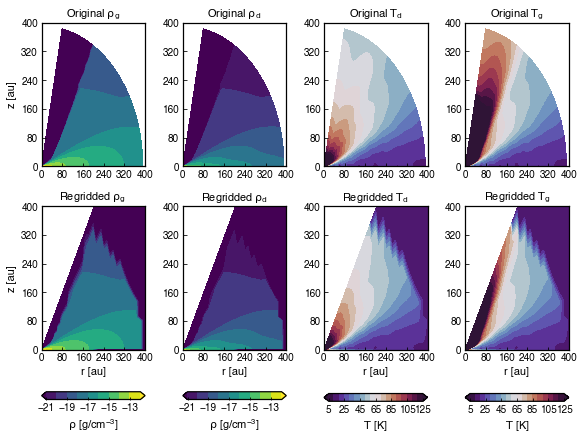

In [98]:
c0 = chemdisk(m0)
c0.set_1()
plot_prechem(c0)
write_environ(c0)
write_chem_inputs(c0)